### RF over Bay of Bengal [lat(15,21) lon(84,93.5)] and SST over Bay of Bengal [lat(15,21) lon(84,93.5)]

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import scipy as sc
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
import seaborn as sns

add_data = "/home/cccr/roxy/matin/MTech_project/data/"

# Filter and Normalized Anomally

In [2]:
def filter_signal_scipy(signal,sample_freq,ltime_period,htime_period,keep_mean):
    filter_signal=np.zeros(signal.shape)
    if any(np.isnan(signal)):
        raise ValueError('There is NaN in the signal')
    else:
        hf=1./ltime_period
        lf=1./htime_period

        temp_fft = sc.fftpack.fft(signal)

        fftfreq = np.fft.fftfreq(len(signal),sample_freq) ### daily data it is 1./365 ## monthly data 1./12 ## yearly data=1
          
        i1=(np.abs(fftfreq) >= lf) & (np.abs(fftfreq) <= hf)  
        inv_fft=np.zeros(temp_fft.size,dtype=complex)
        inv_fft[i1]=temp_fft[i1]
        if keep_mean:
            inv_fft[0]=temp_fft[0]
        filter_signal= np.real_if_close(sc.fftpack.ifft(inv_fft))
    
    return filter_signal

def norm_anom_var(var):
    mean_var = np.mean(var)
    anom_var = var - mean_var
    std_var = np.std(var)
    norm_anom_var = anom_var / std_var
    return norm_anom_var


In [3]:
##DATA

rf = xr.open_dataarray(add_data + "rfbobmm_daily_1998-2019.nc")[:-30]
rf = rf.interpolate_na(dim="time")
sst = xr.open_dataarray(add_data + "tmpC_sstbob_1998-2020.nc")[:-731]


## Plotting the daily climatologies

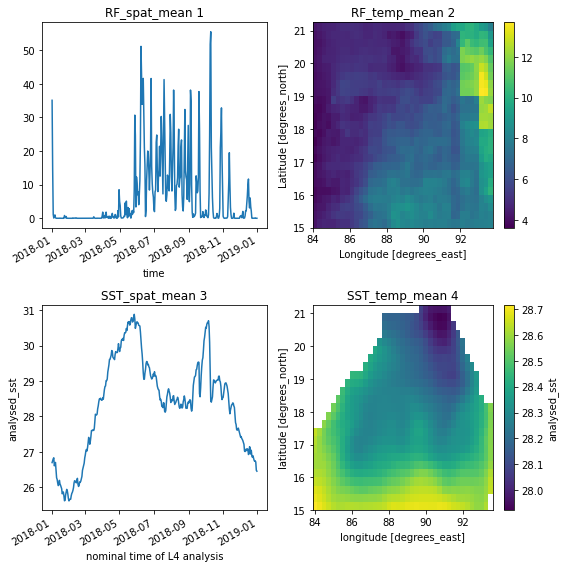

In [4]:
# Load multiple datasets
ds1 = rf[-365:].mean(dim = ['lat','lon'])
ds2 = rf[-365:].mean(dim = ['time'])
ds3 = sst[-365:].mean(dim = ['lat','lon'])
ds4 = sst[-365:].mean(dim = ['time'])


# Create four subplots in a 2x2 layout
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Plot the first dataset on the first subplot
ds1.plot(ax=axs[0, 0])
axs[0, 0].set_title('RF_spat_mean 1')

# Plot the second dataset on the second subplot
ds2.plot(ax=axs[0, 1])
axs[0, 1].set_title('RF_temp_mean 2')

# Plot the third dataset on the third subplot
ds3.plot(ax=axs[1, 0])
axs[1, 0].set_title('SST_spat_mean 3')

# Plot the fourth dataset on the fourth subplot
ds4.plot(ax=axs[1, 1])
axs[1, 1].set_title('SST_temp_mean 4')

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plot
plt.show()

# Display the plot
plt.show()


# Normalized anomallies

In [5]:
rf = xr.open_dataarray(add_data + "rfbobmm_daily_1998-2019.nc")[:-30]
rf = rf.interpolate_na(dim="time")
sst = xr.open_dataarray(add_data + "tmpC_sstbob_1998-2020.nc")[:-731]


n_rf = rf
for i in range(0,39):
    for j in range(0,25):
        n_rf[:,j,i] = norm_anom_var(rf[:,j,i])
n_sst = sst        
for i in range(0,39):
    for j in range(0,25):
        n_sst[:,j,i] = norm_anom_var(sst[:,j,i])

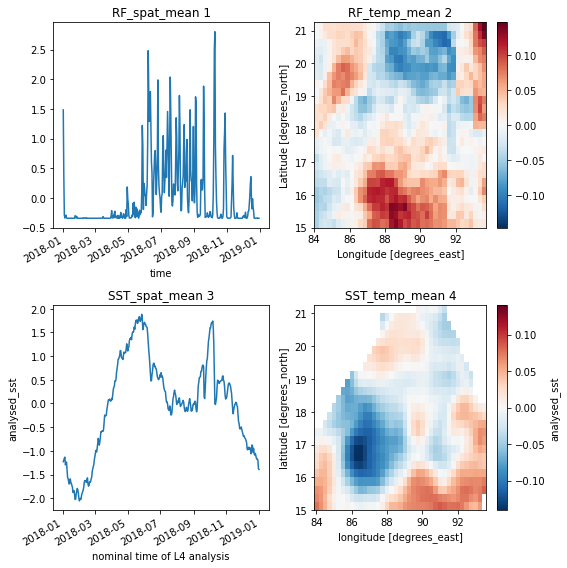

In [6]:
# Load multiple datasets
ds1 = n_rf[-365:].mean(dim = ['lat','lon'])
ds2 = n_rf[-365:].mean(dim = ['time'])
ds3 = n_sst[-365:].mean(dim = ['lat','lon'])
ds4 = n_sst[-365:].mean(dim = ['time'])


# Create four subplots in a 2x2 layout
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Plot the first dataset on the first subplot
ds1.plot(ax=axs[0, 0])
axs[0, 0].set_title('RF_spat_mean 1')

# Plot the second dataset on the second subplot
ds2.plot(ax=axs[0, 1])
axs[0, 1].set_title('RF_temp_mean 2')

# Plot the third dataset on the third subplot
ds3.plot(ax=axs[1, 0])
axs[1, 0].set_title('SST_spat_mean 3')

# Plot the fourth dataset on the fourth subplot
ds4.plot(ax=axs[1, 1])
axs[1, 1].set_title('SST_temp_mean 4')

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plot
plt.show()

# Display the plot
plt.show()


# Filtered SST and RF

In [21]:
rf = xr.open_dataarray(add_data + "rfbobmm_daily_1998-2019.nc")[:-30]
rf = rf.interpolate_na(dim="time")
sst = xr.open_dataarray(add_data + "tmpC_sstbob_1998-2020.nc")[:-731]


sample_freq = 1
ltime_period = 30
htime_period = 60
keep_mean = 0

filtered_rf = rf
for i in range(0,39):
    for j in range(0,25):
        filtered_rf[:,j,i] = filter_signal_scipy(rf[:,j,i].values, sample_freq,
                                              ltime_period, htime_period, keep_mean)
filtered_sst = sst
for i in range(0,39):
    for j in range(0,25):
        if any(np.isnan(sst[:,j,i].values)):
            pass
        else:
            filtered_sst[:,j,i] = filter_signal_scipy(sst[:,j,i].values, sample_freq,
                                              ltime_period, htime_period, keep_mean)

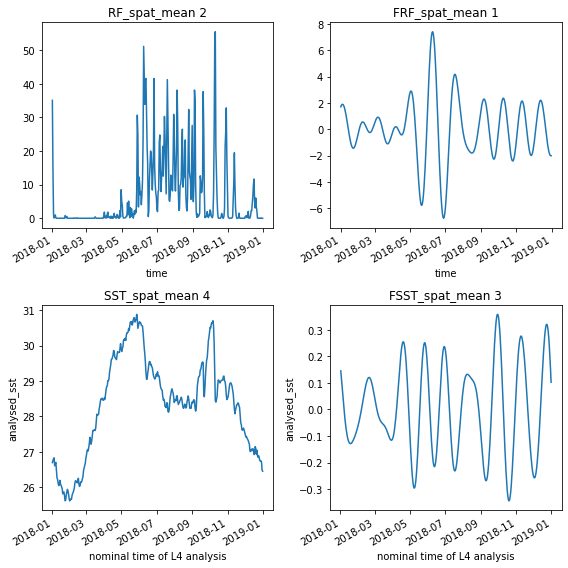

In [8]:
rf = xr.open_dataarray(add_data + "rfbobmm_daily_1998-2019.nc")[:-30]
rf = rf.interpolate_na(dim="time")
sst = xr.open_dataarray(add_data + "tmpC_sstbob_1998-2020.nc")[:-731]

# Load multiple datasets
ds1 = filtered_rf[-365:].mean(dim = ['lat','lon'])
ds2 = rf[-365:].mean(dim = ['lat','lon'])
ds3 = filtered_sst[-365:].mean(dim = ['lat','lon'])
ds4 = sst[-365:].mean(dim = ['lat','lon'])


# Create four subplots in a 2x2 layout
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Plot the first dataset on the first subplot
ds1.plot(ax=axs[0, 1])
axs[0, 1].set_title('FRF_spat_mean 1')

# Plot the second dataset on the second subplot
ds2.plot(ax=axs[0, 0])
axs[0, 0].set_title('RF_spat_mean 2')

# Plot the third dataset on the third subplot
ds3.plot(ax=axs[1, 1])
axs[1, 1].set_title('FSST_spat_mean 3')

# Plot the fourth dataset on the fourth subplot
ds4.plot(ax=axs[1, 0])
axs[1, 0].set_title('SST_spat_mean 4')

# Adjust the spacing between the subplots
plt.tight_layout()
plt.savefig("dailyandfilter")

# Display the plot
plt.show()





# Filter Normalized Rf and SSt

In [11]:
rf = xr.open_dataarray(add_data + "rfbobmm_daily_1998-2019.nc")[:-30]
rf = rf.interpolate_na(dim="time")
sst = xr.open_dataarray(add_data + "tmpC_sstbob_1998-2020.nc")[:-731]

n_rf = rf
for i in range(0,39):
    for j in range(0,25):
        n_rf[:,j,i] = norm_anom_var(rf[:,j,i])
n_sst = sst        
for i in range(0,39):
    for j in range(0,25):
        n_sst[:,j,i] = norm_anom_var(sst[:,j,i])


sample_freq = 1
ltime_period = 30
htime_period = 60
keep_mean = 0

filtered_rf = n_rf
for i in range(0,39):
    for j in range(0,25):
        filtered_rf[:,j,i] = filter_signal_scipy(n_rf[:,j,i].values, sample_freq,
                                              ltime_period, htime_period, keep_mean)
filtered_sst = n_sst
for i in range(0,39):
    for j in range(0,25):
        if any(np.isnan(n_sst[:,j,i].values)):
            pass
        else:
            filtered_sst[:,j,i] = filter_signal_scipy(n_sst[:,j,i].values, sample_freq,
                                              ltime_period, htime_period, keep_mean)

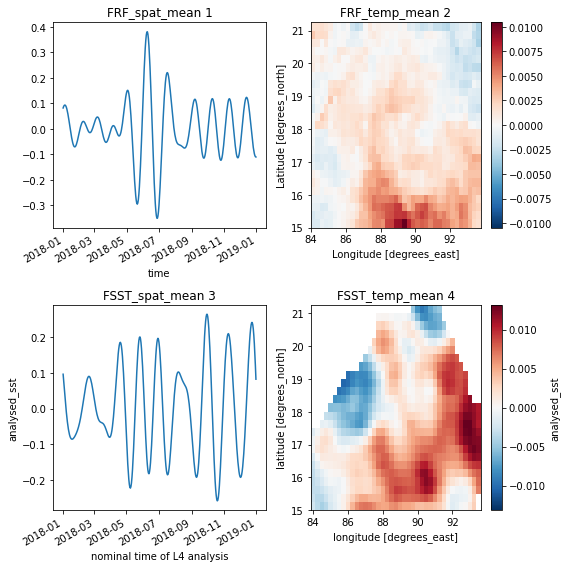

In [12]:
# Load multiple datasets
ds1 = filtered_rf[-365:].mean(dim = ['lat','lon'])
ds2 = filtered_rf[-365:].mean(dim = ['time'])
ds3 = filtered_sst[-365:].mean(dim = ['lat','lon'])
ds4 = filtered_sst[-365:].mean(dim = ['time'])


# Create four subplots in a 2x2 layout
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Plot the first dataset on the first subplot
ds1.plot(ax=axs[0, 0])
axs[0, 0].set_title('FRF_spat_mean 1')

# Plot the second dataset on the second subplot
ds2.plot(ax=axs[0, 1])
axs[0, 1].set_title('FRF_temp_mean 2')

# Plot the third dataset on the third subplot
ds3.plot(ax=axs[1, 0])
axs[1, 0].set_title('FSST_spat_mean 3')

# Plot the fourth dataset on the fourth subplot
ds4.plot(ax=axs[1, 1])
axs[1, 1].set_title('FSST_temp_mean 4')

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plot
plt.show()

# Display the plot
plt.show()


In [13]:
## DATA Slicing for monsoon

In [15]:
rf = xr.open_dataarray(add_data + "rfbobmm_daily_1998-2019.nc")[:-30]
rf = rf.interpolate_na(dim="time")
sst = xr.open_dataarray(add_data + "tmpC_sstbob_1998-2020.nc")[:-731]

sst_mon = sst.isel(time=sst.time.dt.month.isin([5, 6, 7, 8, 9, 10]))
rf_mon = rf.isel(time=rf.time.dt.month.isin([5, 6, 7, 8, 9, 10]))
Fsst_mon = filtered_sst.isel(time=filtered_sst.time.dt.month.isin([5, 6, 7, 8, 9, 10]))
Frf_mon = filtered_rf.isel(time=filtered_rf.time.dt.month.isin([5, 6, 7, 8, 9, 10]))

In [16]:
sst_mean = Fsst_mon.mean(dim = ['lon', 'lat'])
rf_mean = Frf_mon.mean(dim = ['lon', 'lat'])
print("First Std Deviation for SST monsoon DATA = ",sst_mean.std().data)
print("First Std Deviation for RF monsoon DATA = ",rf_mean.std().data)


First Std Deviation for SST monsoon DATA =  0.16995814442634583
First Std Deviation for RF monsoon DATA =  0.2164383828639984


In [17]:
rf = xr.open_dataarray(add_data + "rfbobmm_daily_1998-2019.nc")[:-30]
rf = rf.interpolate_na(dim="time")
sst = xr.open_dataarray(add_data + "tmpC_sstbob_1998-2020.nc")[:-731]

n_rf = rf
for i in range(0,39):
    for j in range(0,25):
        n_rf[:,j,i] = norm_anom_var(rf[:,j,i])
n_sst = sst        
for i in range(0,39):
    for j in range(0,25):
        n_sst[:,j,i] = norm_anom_var(sst[:,j,i])



# Dry and Wet Spell

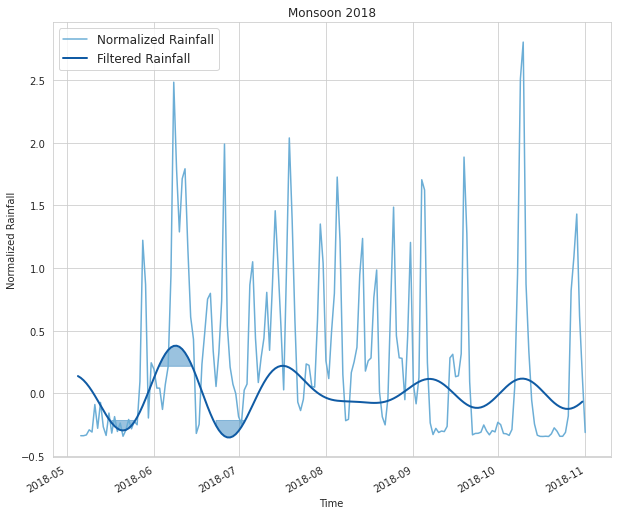

In [18]:

palette = sns.color_palette("Blues_r", n_colors=5)
plt.figure(figsize=[10,8])
sns.set_style("whitegrid")

#spat_mean of normalized data to plot the time series
rainfall_mean = n_rf.mean(dim = ['lon', 'lat'])[-240:-60]

xr.DataArray(rainfall_mean, coords={"time":rainfall_mean.time},dims=["time"]).plot(color = palette[2], label='Normalized Rainfall')

rainfall_mean = Frf_mon.mean(dim = ['lon', 'lat'])[-180:]
filtered_rf = xr.DataArray(rainfall_mean, coords={"time":rainfall_mean.time},dims=["time"])
filtered_rf.plot(color = palette[0], label='Filtered Rainfall', linewidth=2)

x = filtered_rf.time.data
y = filtered_rf.data
above_threshold = y > 0.216
below_threshold = y < -0.216
plt.fill_between(x, y, 0.216, where=above_threshold, color=palette[1], alpha=0.5)
plt.fill_between(x, y, -0.216, where=below_threshold, color=palette[1], alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Normalized Rainfall')
plt.title('Monsoon 2018')

plt.rcParams.update({'font.size': 14})
plt.legend(fontsize=12)

plt.savefig('rfDry_wetSpell.png', dpi=300)

plt.show()


# Hot and Cold phase

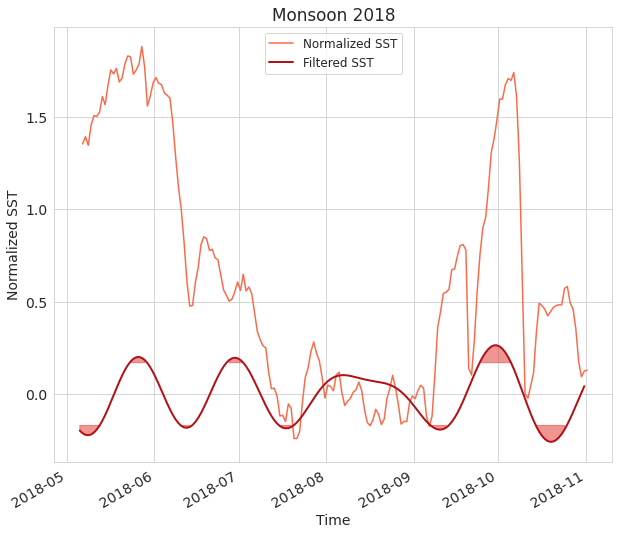

In [19]:

palette = sns.color_palette("Reds_r", n_colors=5)

plt.figure(figsize=[10,8])
sns.set_style("whitegrid")

nsst_mean = n_sst.mean(dim = ['lon', 'lat'])[-240:-60]

xr.DataArray(nsst_mean, coords={"time":nsst_mean.time},dims=["time"]).plot(color = palette[2], label='Normalized SST')

sst_mean = Fsst_mon.mean(dim = ['lon', 'lat'])[-180:]
filtered_sst = xr.DataArray(sst_mean, coords={"time":sst_mean.time},dims=["time"])
filtered_sst.plot(color = palette[0], label='Filtered SST', linewidth=2)

x = filtered_sst.time.data
y = filtered_sst.data
above_threshold = y > 0.17
below_threshold = y < -0.17
plt.fill_between(x, y, 0.17, where=above_threshold, color=palette[1], alpha=0.5)
plt.fill_between(x, y, -0.17, where=below_threshold, color=palette[1], alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Normalized SST')
plt.title('Monsoon 2018')

plt.rcParams.update({'font.size': 14})
plt.legend(fontsize=12)

plt.savefig('sstWarn_coldPhase.png', dpi=300)

plt.show()


## Monsoon 2018 - Filtered Rainfall and SST Data

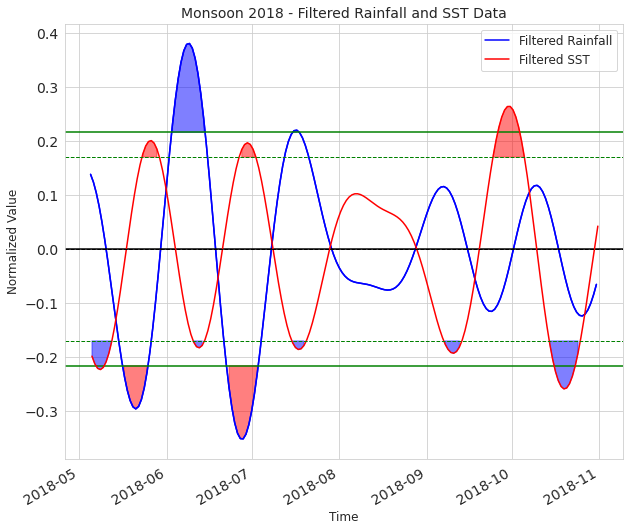

In [20]:
plt.figure(figsize=[10,8])

# Plot filtered rainfall data
rainfall_mean = Frf_mon.mean(dim = ['lon', 'lat'])[-180:]
filtered_rf = xr.DataArray(rainfall_mean, coords={"time":rainfall_mean.time},dims=["time"])
x = filtered_rf.time.data
y = filtered_rf.data
filtered_rf.plot(color = 'b', label='Filtered Rainfall')
sns.lineplot(x=x, y=y, color='b')
plt.axhline(y=0, color='black')
plt.axhline(y=0.216, color='g')
plt.axhline(y=-0.216, color='g')
above_threshold = y > 0.216
below_threshold = y < -0.216
plt.fill_between(x, y, 0.216, where=above_threshold, color='blue', alpha=0.5)
plt.fill_between(x, y, -0.216, where=below_threshold, color='red', alpha=0.5)


# Plot filtered SST data
sst_mean = Fsst_mon.mean(dim = ['lon', 'lat'])[-180:]
filtered_sst = xr.DataArray(sst_mean, coords={"time":sst_mean.time},dims=["time"])
x = filtered_sst.time.data
y = filtered_sst.data
filtered_sst.plot(color = 'r', label='Filtered SST')

# Add horizontal lines and fill color between them
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=0.17, color='g', linestyle='--', linewidth=1)
plt.axhline(y=-0.17, color='g', linestyle='--', linewidth=1)
above_threshold = y > 0.17
below_threshold = y < -0.17
plt.fill_between(x, y, 0.17, where=above_threshold, color='red', alpha=0.5)
plt.fill_between(x, y, -0.17, where=below_threshold, color='blue', alpha=0.5)

# Set axis labels and title
plt.xlabel('Time', fontsize=12)
plt.ylabel('Normalized Value', fontsize=12)
plt.title("Monsoon 2018 - Filtered Rainfall and SST Data", fontsize=14)

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Add gridlines
plt.grid(True)

# Save figure
plt.savefig("CombinedSSTRF.png")


# Correlation

## Yearly Data Correlation

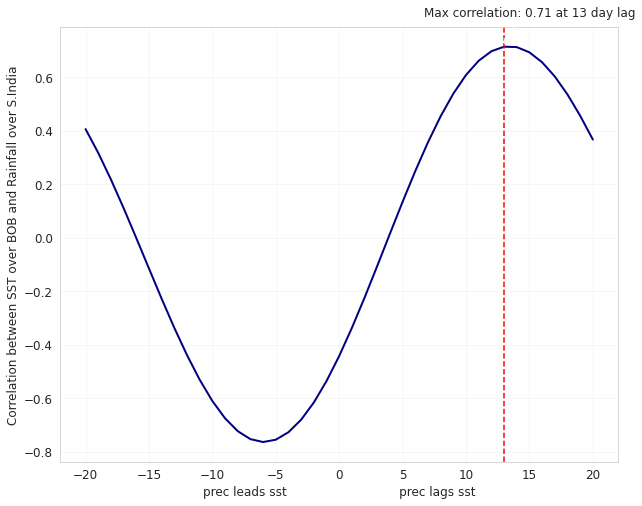

In [22]:
def corr(rainfall, filtered_sst, lag_days):
    filter_rf_box = rainfall[365:-365+lag_days,:,:]
    filter_rf_box_mean = filter_rf_box.mean(dim = ['lon', 'lat'])
    filter_sst_box = filtered_sst[365-lag_days:-365,:,:]
    filter_sst_box_mean = filter_sst_box.mean(dim = ['lat', 'lon'])
    return np.corrcoef(filter_rf_box_mean,filter_sst_box_mean )[0][1]
    
# Calculate correlations for different lags
lags = range(-20, 21)
corrs = [corr(filtered_rf, filtered_sst, lag) for lag in lags]

# Find the lag with maximum correlation
max_corr = max(corrs)
max_lag = lags[corrs.index(max_corr)]

# Plot the correlations
plt.figure(figsize=[10,8])
plt.plot(lags, corrs, linewidth=2, color='navy')
plt.axvline(x=max_lag, color='red', linestyle='--')
plt.annotate(f"Max correlation: {max_corr:.2f} at {max_lag} day lag", 
             xy=(max_lag, max_corr), xycoords='data',
             xytext=(-80, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"),
             fontsize=12)
plt.xlabel("prec leads sst                             prec lags sst", fontsize=12)
plt.ylabel("Correlation between SST over BOB and Rainfall over S.India", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.2)
plt.savefig("BOBCorrBOByr.png")
plt.show()

## Monsoon Data Correalation

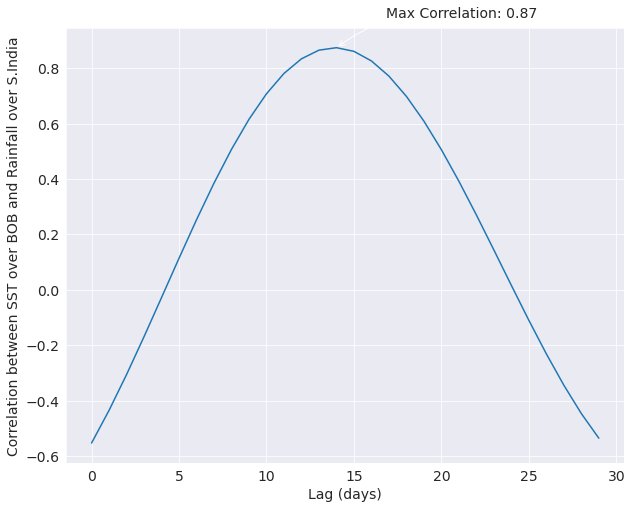

In [23]:
import seaborn as sns

# Function to calculate correlation between rainfall and filtered SST
def corr(rainfall, filtered_sst, lag_days):
    Fsst_mon = filtered_sst.isel(time=filtered_sst.time.dt.month.isin([5, 6, 7, 8, 9, 10]))
    Frf_mon = rainfall.isel(time=rainfall.time.dt.month.isin([5, 6, 7, 8, 9, 10]))
    Fsst_meam = Fsst_mon.mean(dim = ['lon', 'lat'])
    Frf_meam = Frf_mon.mean(dim = ['lon', 'lat'])
    Csst = []
    for i in range(0,3864,184):
        Csst.extend(Fsst_meam[31-lag_days+i:153-lag_days+i].data)
    Crf = []
    for i in range(0,3864,184):
        Crf.extend(Frf_meam[31+i:153+i].data)

    return np.corrcoef(Csst, Crf)[0][1]

# Calculate correlation for various lag days
corrs = [corr(filtered_rf, filtered_sst, i) for i in range(0,30)]

# Plot the results using Seaborn
sns.set_style("darkgrid")
plt.figure(figsize=[10,8])
sns.lineplot(x=range(0,30), y=corrs)
plt.xlabel("Lag (days)")
plt.ylabel("Correlation between SST over BOB and Rainfall over S.India")
#plt.title("Correlation between SST and Rainfall over BOB for various lag days")
plt.annotate(f"Max Correlation: {max(corrs):.2f}", xy=(np.argmax(corrs), max(corrs)), xycoords='data',
            xytext=(50, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=.2"))
plt.savefig("SICorrjjas.png")
plt.show()

## Data Prep

In [25]:
rf = xr.open_dataarray(add_data + "rfbobmm_daily_1998-2019.nc")[:-30]
rf = rf.interpolate_na(dim="time")
sst = xr.open_dataarray(add_data + "tmpC_sstbob_1998-2020.nc")[:-731]

sample_freq = 1
ltime_period = 30
htime_period = 60
keep_mean = 0

filtered_rf = rf
for i in range(0,39):
    for j in range(0,25):
        filtered_rf[:,j,i] = filter_signal_scipy(rf[:,j,i].values, sample_freq,
                                              ltime_period, htime_period, keep_mean)
filtered_sst = n_sst
for i in range(0,39):
    for j in range(0,25):
        if any(np.isnan(n_sst[:,j,i].values)):
            pass
        else:
            filtered_sst[:,j,i] = filter_signal_scipy(sst[:,j,i].values, sample_freq,
                                              ltime_period, htime_period, keep_mean)

In [26]:
filtered_sst.to_netcdf(add_data + "FilteredSSTBOB_0.nc")
filtered_rf.to_netcdf(add_data + "FilteredrfBOB_0lag.nc")


In [30]:
filtered_sst = filtered_sst[:-13]
filtered_sst.to_netcdf(add_data + "FilteredSSTBOB_13.nc")
filtered_rf = filtered_rf[13:]
filtered_rf.to_netcdf(add_data + "FilteredrfBOB_13lag.nc")


In [37]:
xr.open_dataarray(add_data + "FilteredrfBOB_13lag.nc")[1].data

array([[ 0.5592146 ,  0.22177926, -0.4183876 , -0.44993344, -0.64007944,
        -0.5943394 , -0.6491192 , -0.56708986, -0.2972624 ,  0.01904627,
         0.3104301 ,  0.56837636,  0.01028478,  0.14055835, -0.4312201 ,
        -0.31143838, -0.51221937, -0.7611691 , -1.1920452 , -1.1036106 ,
        -0.9623233 , -1.12443   , -0.7001211 , -0.697385  , -0.3903928 ,
        -0.82452357, -0.69212145, -0.4820279 , -0.74188995, -0.65062636,
        -0.4188784 , -0.7887638 , -1.2749592 , -1.4230846 , -1.5836232 ,
        -0.9577172 , -1.008089  , -0.758454  , -0.4162648 ],
       [-0.28779778,  0.05583533,  0.04829577,  0.07210761, -0.87738067,
        -0.81986004, -0.96426976, -0.6392582 , -0.6574619 , -0.51510215,
        -0.10648577,  0.42912838,  0.23453075,  0.3364867 ,  0.18916298,
         0.21602625, -0.46111545, -0.71897495, -0.5321046 , -0.69400257,
        -0.79564935, -0.62951344, -0.8618156 , -1.1143467 , -1.0138713 ,
        -1.3845493 , -1.539487  , -1.3880339 , -1.3130575 , -0.